<a href="https://colab.research.google.com/github/subupkrl/Python/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA of githhub_trending_repos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/github_trending_repos.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,owner,repo_name,full_name,description,language,stars,forks,stars_period,contributors_count,url,search_language,timeframe,scraped_at
0,sansan0,TrendRadar,sansan0/TrendRadar,🎯 告别信息过载，AI 助你看懂新闻资讯热点，简单的舆情监控分析 - 多平台热点聚合+基于 ...,Python,36604,19908,1067,0,https://github.com/sansan0/TrendRadar,overall,daily,2025-12-03 17:34:14.528785
1,google,adk-go,google/adk-go,"An open-source, code-first Go toolkit for buil...",Go,5920,396,118,0,https://github.com/google/adk-go,overall,daily,2025-12-03 17:34:14.529175
2,TapXWorld,ChinaTextbook,TapXWorld/ChinaTextbook,所有小初高、大学PDF教材。,Roff,60750,13494,226,0,https://github.com/TapXWorld/ChinaTextbook,overall,daily,2025-12-03 17:34:14.529535
3,yeongpin,cursor-free-vip,yeongpin/cursor-free-vip,[Support 0.49.x]（Reset Cursor AI MachineID & B...,Python,44916,5365,250,0,https://github.com/yeongpin/cursor-free-vip,overall,daily,2025-12-03 17:34:14.529894
4,nvm-sh,nvm,nvm-sh/nvm,Node Version Manager - POSIX-compliant bash sc...,Shell,90205,9641,67,0,https://github.com/nvm-sh/nvm,overall,daily,2025-12-03 17:34:14.530228


In [ ]:
df.tail()

,owner,repo_name,full_name,description,language,stars,forks,stars_period,contributors_count,url,search_language,timeframe,scraped_at
1582,centrifuge,protocol,centrifuge/protocol,Centrifuge Protocol: The open infrastructure f...,Solidity,38,16,4,0,https://github.com/centrifuge/protocol,solidity,monthly,2025-12-03 17:38:41.796383
1583,Uniswap,permit2,Uniswap/permit2,🔑🔑🔑 next generation token approvals mechanism,Solidity,890,265,16,0,https://github.com/Uniswap/permit2,solidity,monthly,2025-12-03 17:38:41.796725
1584,a16z,erc4626-tests,a16z/erc4626-tests,ERC4626 Property Tests,Solidity,191,30,3,0,https://github.com/a16z/erc4626-tests,solidity,monthly,2025-12-03 17:38:41.797093
1585,foundry-rs,forge-std,foundry-rs/forge-std,A collection of helpful contracts and librarie...,Solidity,983,433,18,0,https://github.com/foundry-rs/forge-std,solidity,monthly,2025-12-03 17:38:41.797425
1586,mztacat,Base,mztacat/Base,NaN,Solidity,487,398,18,0,https://github.com/mztacat/Base,solidity,monthly,2025-12-03 17:38:41.797769


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   owner               1587 non-null   object
 1   repo_name           1587 non-null   object
 2   full_name           1587 non-null   object
 3   description         1551 non-null   object
 4   language            1587 non-null   object
 5   stars               1587 non-null   int64 
 6   forks               1587 non-null   int64 
 7   stars_period        1587 non-null   int64 
 8   contributors_count  1587 non-null   int64 
 9   url                 1587 non-null   object
 10  search_language     1587 non-null   object
 11  timeframe           1587 non-null   object
 12  scraped_at          1587 non-null   object
dtypes: int64(4), object(9)
memory usage: 161.3+ KB


In [ ]:
df.describe()

,stars,forks,stars_period,contributors_count
count,1587.000000,1587.000000,1587.000000,1587.0
mean,16491.507876,3078.655325,289.509767,0.0
std,24376.828917,7858.052834,1402.579578,0.0
min,25.000000,4.000000,0.000000,0.0
25%,2780.500000,343.000000,4.000000,0.0
50%,7956.000000,1037.000000,28.000000,0.0
75%,20989.000000,2856.000000,142.000000,0.0
max,434010.000000,143957.000000,30879.000000,0.0


In [ ]:
df.isnull().sum()

,0
owner,0
repo_name,0
full_name,0
description,36
language,0
stars,0
forks,0
stars_period,0
contributors_count,0
url,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1587, 13)

In [ ]:
#numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical variables: {} ' .format(len(numerical_features),numerical_features))

We have 4 numerical variables: ['stars', 'forks', 'stars_period', 'contributors_count'] 


In [ ]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} categorical variables: {} ' .format(len(categorical_features),categorical_features))

We have 9 categorical variables: ['owner', 'repo_name', 'full_name', 'description', 'language', 'url', 'search_language', 'timeframe', 'scraped_at'] 


In [ ]:
#porportion of count data on categorical features
for col in categorical_features:
  print(df[col].value_counts(normalize = 'True')*100)
  print('...................')

owner
google          2.142407
apache          1.197227
microsoft       0.882168
folke           0.693132
apple           0.567108
                  ...   
larastan        0.063012
mautic          0.063012
sparkison       0.063012
alexjustesen    0.063012
firefly-iii     0.063012
Name: proportion, Length: 882, dtype: float64
...................
repo_name
TrendRadar              0.441084
WindTerm                0.378072
blockscout              0.378072
NMMiner                 0.315060
netdata                 0.315060
                          ...   
sp1-contracts           0.063012
solidity-bytes-utils    0.063012
contracts               0.063012
book                    0.063012
contract-deployments    0.063012
Name: proportion, Length: 1043, dtype: float64
...................
full_name
kingToolbox/WindTerm        0.378072
sansan0/TrendRadar          0.378072
netdata/netdata             0.315060
NMminer1024/NMMiner         0.315060
open-quantum-safe/liboqs    0.252048
                  

In [ ]:
for col in numerical_features:
  print(df[col].value_counts(normalize = 'True')*100)
  print('..............')

stars
36604    0.378072
28931    0.378072
6650     0.315060
357      0.315060
76892    0.315060
           ...   
3506     0.063012
33525    0.063012
175      0.063012
976      0.063012
16002    0.063012
Name: proportion, Length: 1021, dtype: float64
..............
forks
27       0.504096
176      0.441084
2229     0.378072
343      0.378072
19908    0.378072
           ...   
2790     0.063012
55       0.063012
2413     0.063012
1687     0.063012
395      0.063012
Name: proportion, Length: 887, dtype: float64
..............
stars_period
0      7.120353
1      6.364209
3      4.662886
2      4.662886
4      2.457467
         ...   
310    0.063012
472    0.063012
550    0.063012
275    0.063012
122    0.063012
Name: proportion, Length: 435, dtype: float64
..............
contributors_count
0    100.0
Name: proportion, dtype: float64
..............


/tmp/ipython-input-354609010.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = df[numerical_features[i]], fill = True, color = 'red')


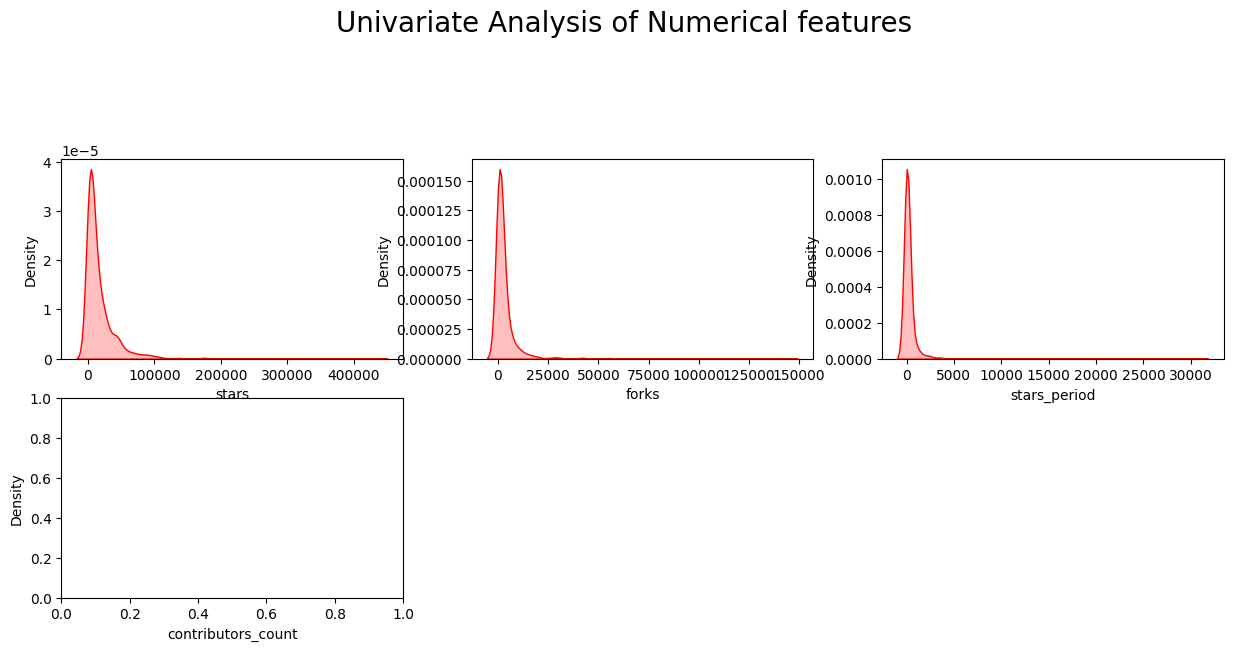

In [ ]:
#uni-variate analysis of numerical features
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical features',fontsize = 20)

for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df[numerical_features[i]], fill = True, color = 'red')
  plt.xlabel(numerical_features[i])
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21578 (\N{CJK UNIFIED IDEOGRAPH-544A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

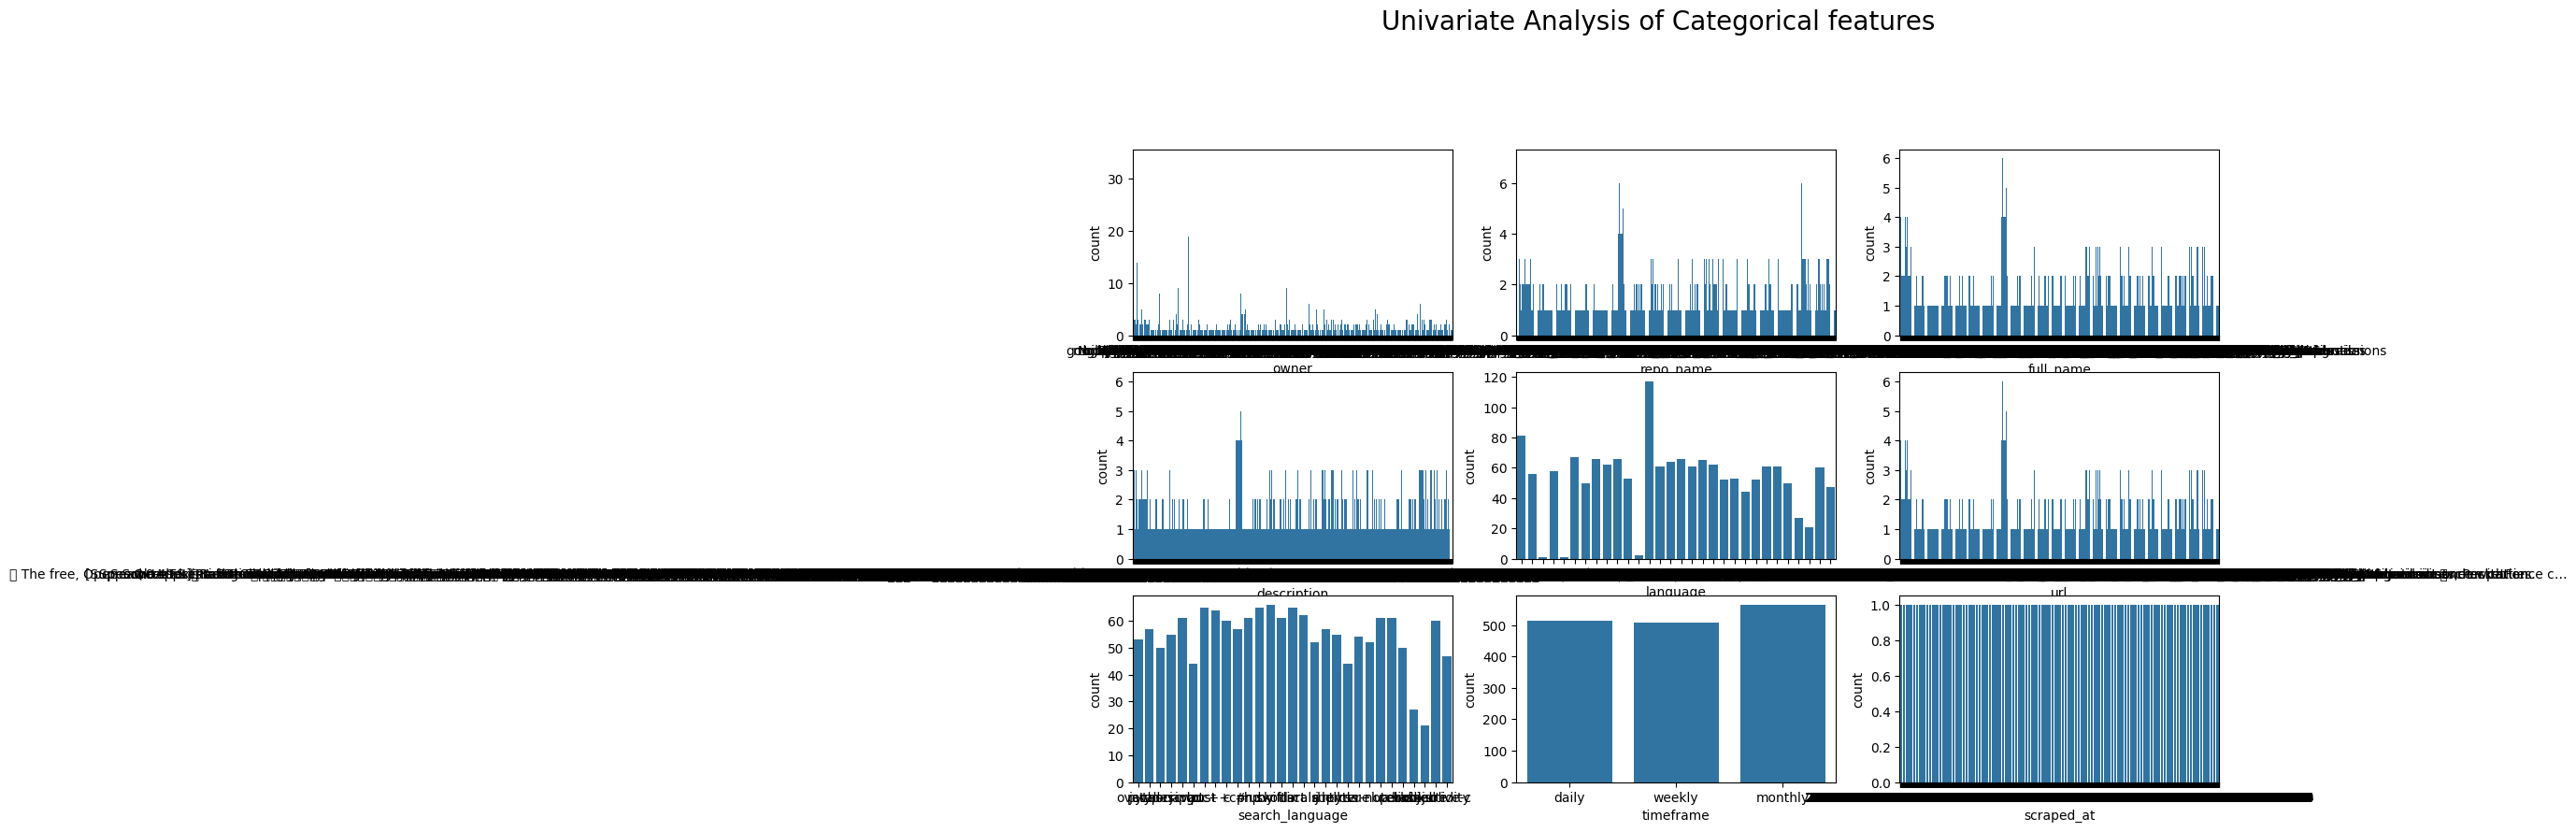

In [ ]:
#uni-variate for categorical features
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Categorical features',fontsize = 20)

for i in range(0,len(categorical_features)):
  plt.subplot(5,3,i+1)
  sns.countplot(x = df[categorical_features[i]])
  plt.xlabel(categorical_features[i])
plt.show()

<Axes: ylabel='count'>

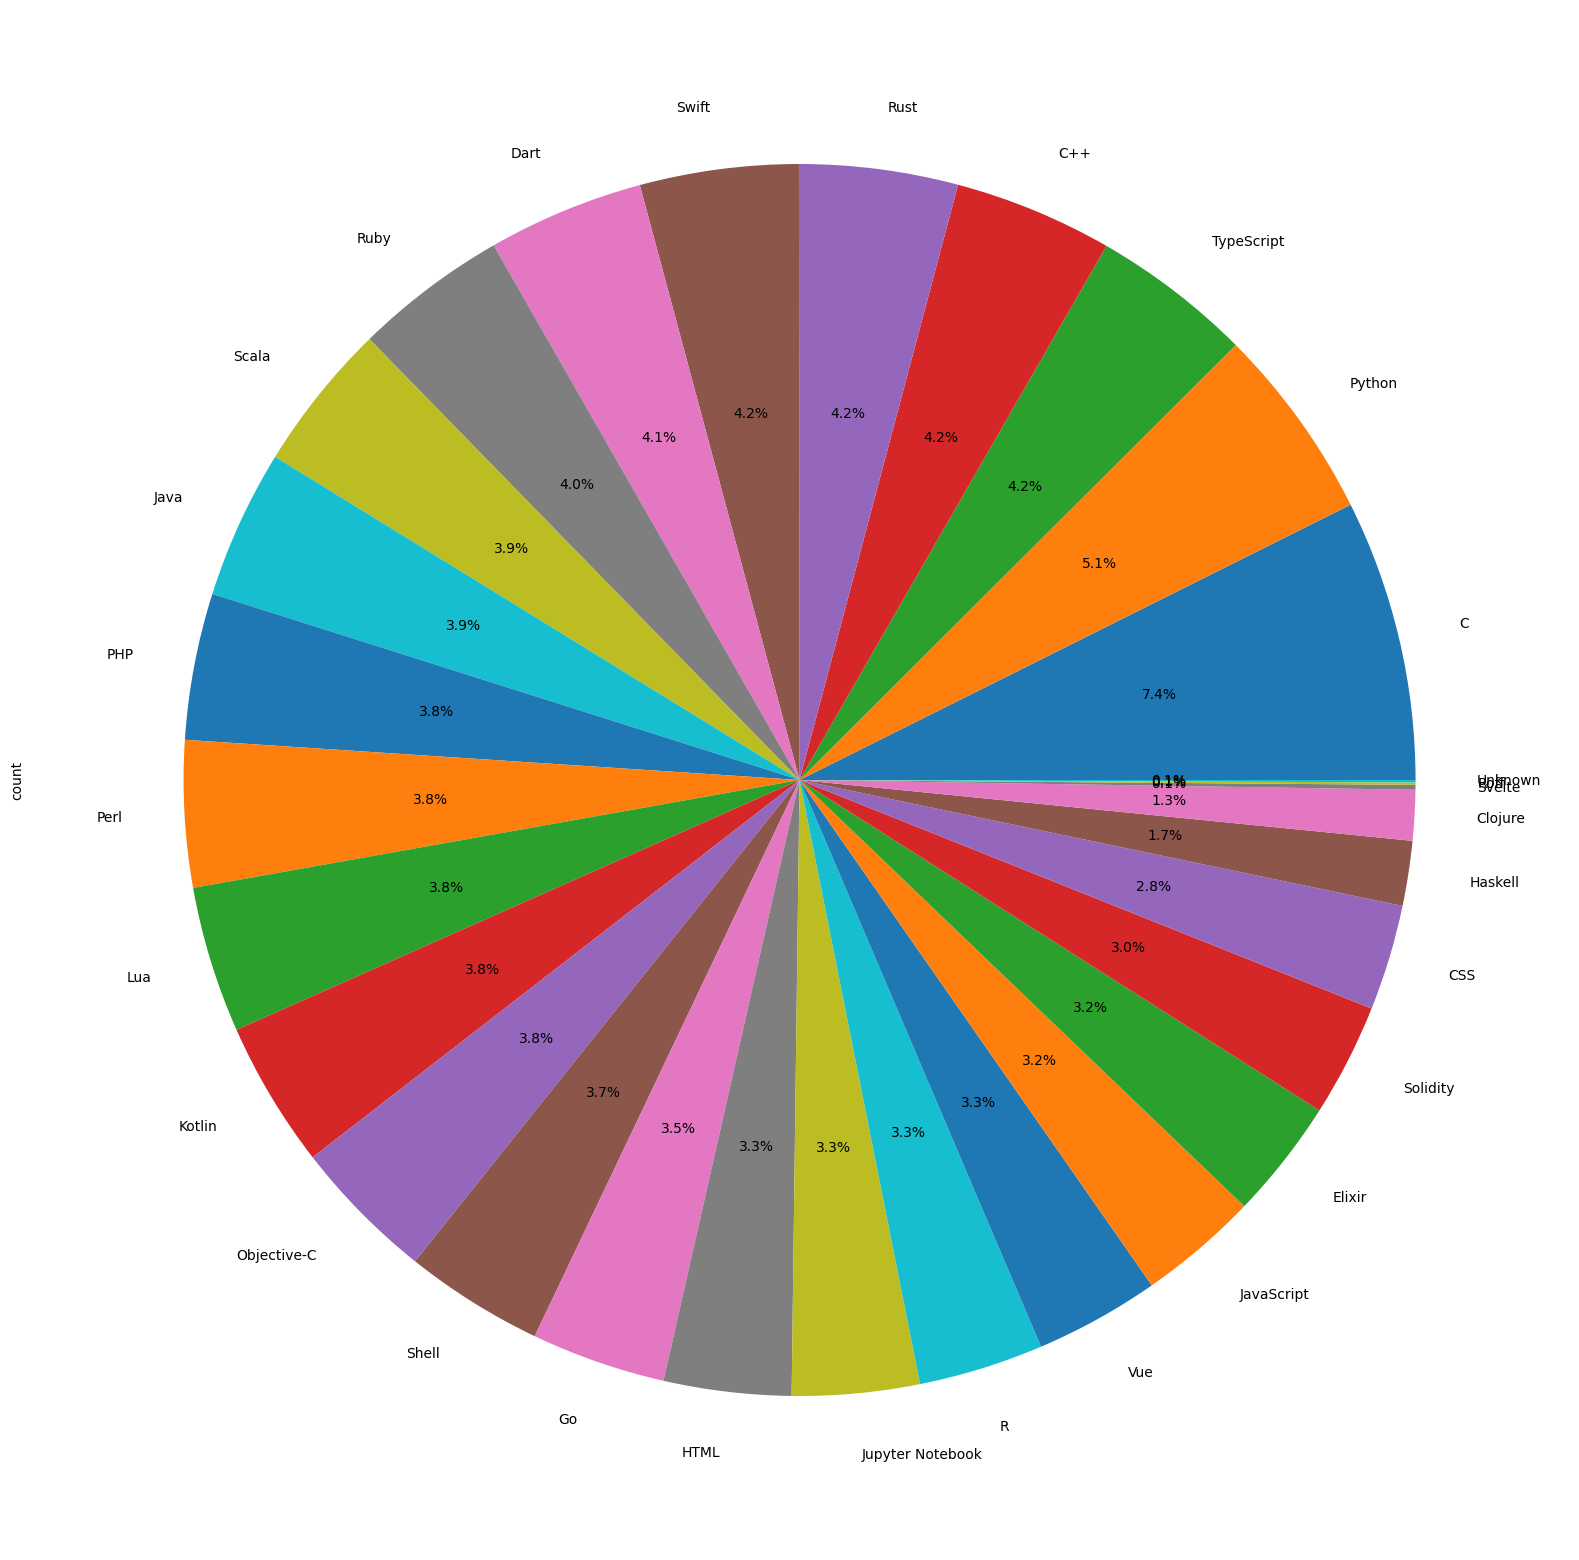

In [ ]:
df['language'].value_counts().plot.pie(y=df['language'].value_counts(),figsize=(20,20),autopct = '%1.1f%%')

In [ ]:
df['repo_name'].value_counts().head(10)

,count
repo_name,
TrendRadar,7
WindTerm,6
blockscout,6
NMMiner,5
netdata,5
docs,4
betaflight,4
php-src,4
liboqs,4


EDA of spotify analysis dataset

In [ ]:
file_path = '/content/drive/MyDrive/spotify_analysis_dataset.csv'
df1 = pd.read_csv(file_path)

In [ ]:
df1.head()

,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


In [ ]:
df1.tail()

,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
45,TRK1045,Song 45,Artist 3,Album 15,2010-02-15,207939,11,0.093,0.940,-38.78,0.492,0.991,0.085,0.456,0.954,79.44
46,TRK1046,Song 46,Artist 12,Album 13,2010-02-16,269213,38,0.897,0.954,-38.51,0.473,0.413,0.987,0.620,0.606,149.72
47,TRK1047,Song 47,Artist 7,Album 1,2010-02-17,225878,1,0.900,0.915,-7.10,0.173,0.372,0.374,0.277,0.229,85.46
48,TRK1048,Song 48,Artist 4,Album 7,2010-02-18,284899,2,0.633,0.370,-25.59,0.434,0.776,0.371,0.188,0.672,108.39
49,TRK1049,Song 49,Artist 9,Album 9,2010-02-19,182623,55,0.339,0.015,-34.92,0.399,0.341,0.813,0.464,0.618,185.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   owner               1587 non-null   object
 1   repo_name           1587 non-null   object
 2   full_name           1587 non-null   object
 3   description         1551 non-null   object
 4   language            1587 non-null   object
 5   stars               1587 non-null   int64 
 6   forks               1587 non-null   int64 
 7   stars_period        1587 non-null   int64 
 8   contributors_count  1587 non-null   int64 
 9   url                 1587 non-null   object
 10  search_language     1587 non-null   object
 11  timeframe           1587 non-null   object
 12  scraped_at          1587 non-null   object
dtypes: int64(4), object(9)
memory usage: 161.3+ KB


In [ ]:
df.describe()

,stars,forks,stars_period,contributors_count
count,1587.000000,1587.000000,1587.000000,1587.0
mean,16491.507876,3078.655325,289.509767,0.0
std,24376.828917,7858.052834,1402.579578,0.0
min,25.000000,4.000000,0.000000,0.0
25%,2780.500000,343.000000,4.000000,0.0
50%,7956.000000,1037.000000,28.000000,0.0
75%,20989.000000,2856.000000,142.000000,0.0
max,434010.000000,143957.000000,30879.000000,0.0


In [ ]:
df1.isnull().sum()

,0
track_id,0
track_name,0
artist,0
album,0
release_date,0
duration_ms,0
popularity,0
danceability,0
energy,0
loudness,0


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.shape

(50, 16)

In [ ]:
#numerical features
numerical_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
print('We have {} numerical variables: {} ' .format(len(numerical_features),numerical_features))

We have 11 numerical variables: ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] 


In [ ]:
#categorical features
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']
print('We have {} categorical variables: {} ' .format(len(categorical_features),categorical_features))

We have 5 categorical variables: ['track_id', 'track_name', 'artist', 'album', 'release_date'] 


In [ ]:
#porportion of count data on categorical features
for col in categorical_features:
  print(df1[col].value_counts(normalize = 'True')*100)
  print('...................')

track_id
TRK1000    2.0
TRK1001    2.0
TRK1002    2.0
TRK1003    2.0
TRK1004    2.0
TRK1005    2.0
TRK1006    2.0
TRK1007    2.0
TRK1008    2.0
TRK1009    2.0
TRK1010    2.0
TRK1011    2.0
TRK1012    2.0
TRK1013    2.0
TRK1014    2.0
TRK1015    2.0
TRK1016    2.0
TRK1017    2.0
TRK1018    2.0
TRK1019    2.0
TRK1020    2.0
TRK1021    2.0
TRK1022    2.0
TRK1023    2.0
TRK1024    2.0
TRK1025    2.0
TRK1026    2.0
TRK1027    2.0
TRK1028    2.0
TRK1029    2.0
TRK1030    2.0
TRK1031    2.0
TRK1032    2.0
TRK1033    2.0
TRK1034    2.0
TRK1035    2.0
TRK1036    2.0
TRK1037    2.0
TRK1038    2.0
TRK1039    2.0
TRK1040    2.0
TRK1041    2.0
TRK1042    2.0
TRK1043    2.0
TRK1044    2.0
TRK1045    2.0
TRK1046    2.0
TRK1047    2.0
TRK1048    2.0
TRK1049    2.0
Name: proportion, dtype: float64
...................
track_name
Song 0     2.0
Song 1     2.0
Song 2     2.0
Song 3     2.0
Song 4     2.0
Song 5     2.0
Song 6     2.0
Song 7     2.0
Song 8     2.0
Song 9     2.0
Song 10    2.0
Song 11    2

In [ ]:
for col in numerical_features:
  print(df1[col].value_counts(normalize = 'True')*100)
  print('..............')

duration_ms
240151    2.0
253767    2.0
244375    2.0
299262    2.0
256330    2.0
159504    2.0
284231    2.0
133986    2.0
181858    2.0
249312    2.0
132666    2.0
158660    2.0
254633    2.0
146854    2.0
184505    2.0
224488    2.0
142662    2.0
128392    2.0
150535    2.0
233569    2.0
172256    2.0
209135    2.0
247478    2.0
155222    2.0
197373    2.0
243684    2.0
130965    2.0
144538    2.0
228066    2.0
233252    2.0
259182    2.0
278338    2.0
218806    2.0
257982    2.0
230989    2.0
210982    2.0
241626    2.0
239176    2.0
251278    2.0
242409    2.0
143419    2.0
170015    2.0
242096    2.0
227059    2.0
230687    2.0
207939    2.0
269213    2.0
225878    2.0
284899    2.0
182623    2.0
Name: proportion, dtype: float64
..............
popularity
61    12.0
27     6.0
58     4.0
43     4.0
26     4.0
2      4.0
51     4.0
96     4.0
70     2.0
65     2.0
85     2.0
44     2.0
56     2.0
29     2.0
83     2.0
5      2.0
74     2.0
88     2.0
91     2.0
0      2.0
41     2.

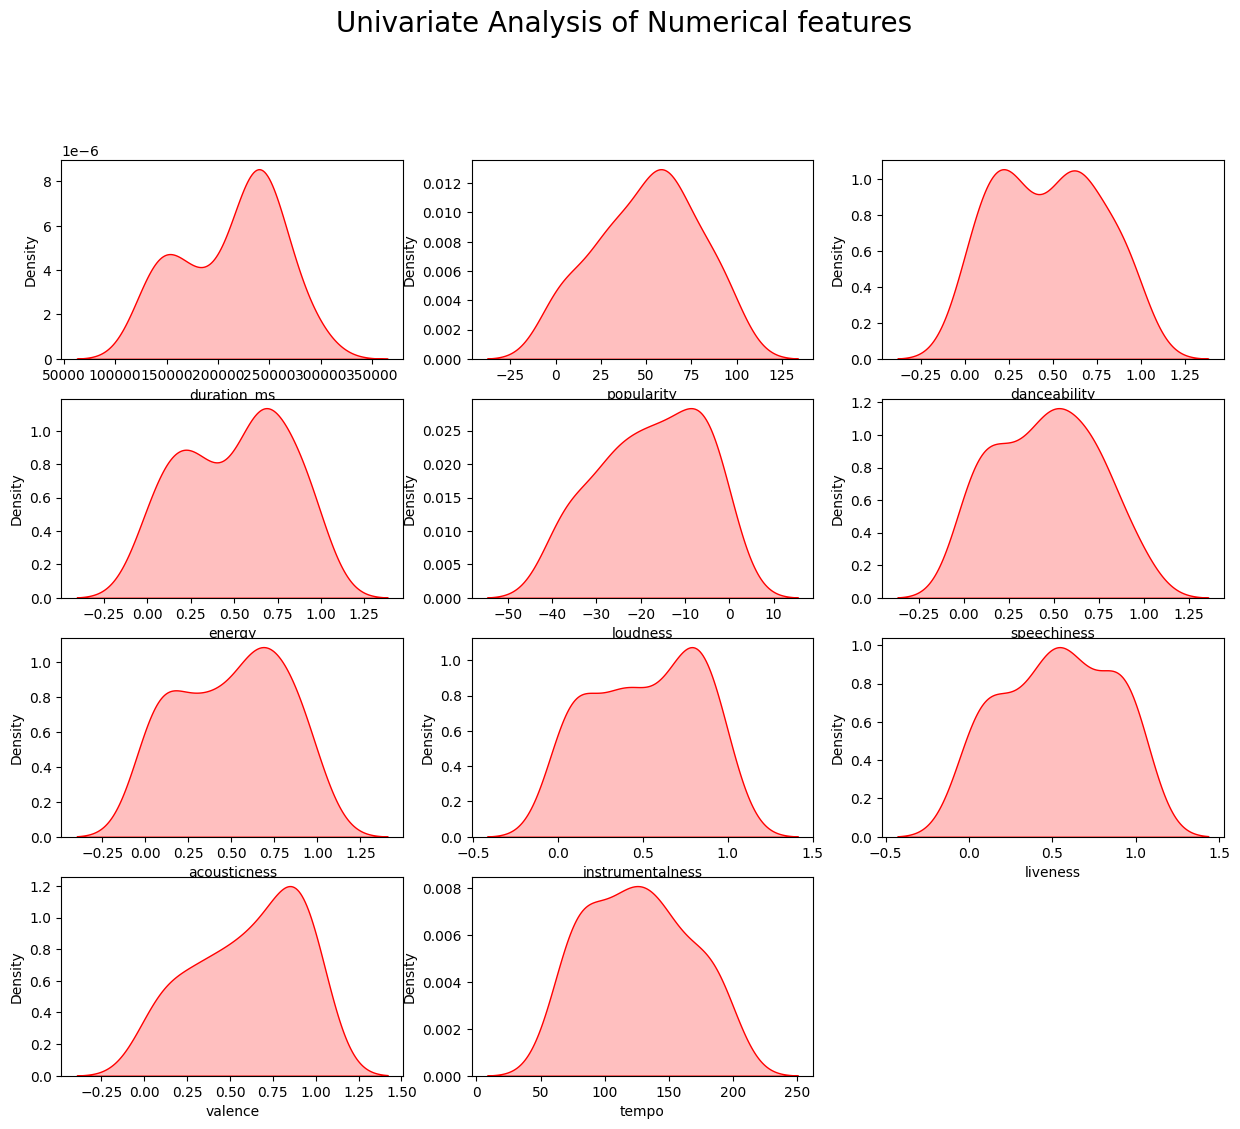

In [ ]:
#uni-variate analysis of numerical features

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical features',fontsize = 20)

for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df1[numerical_features[i]], fill = True, color = 'red')
  plt.xlabel(numerical_features[i])
plt.show()

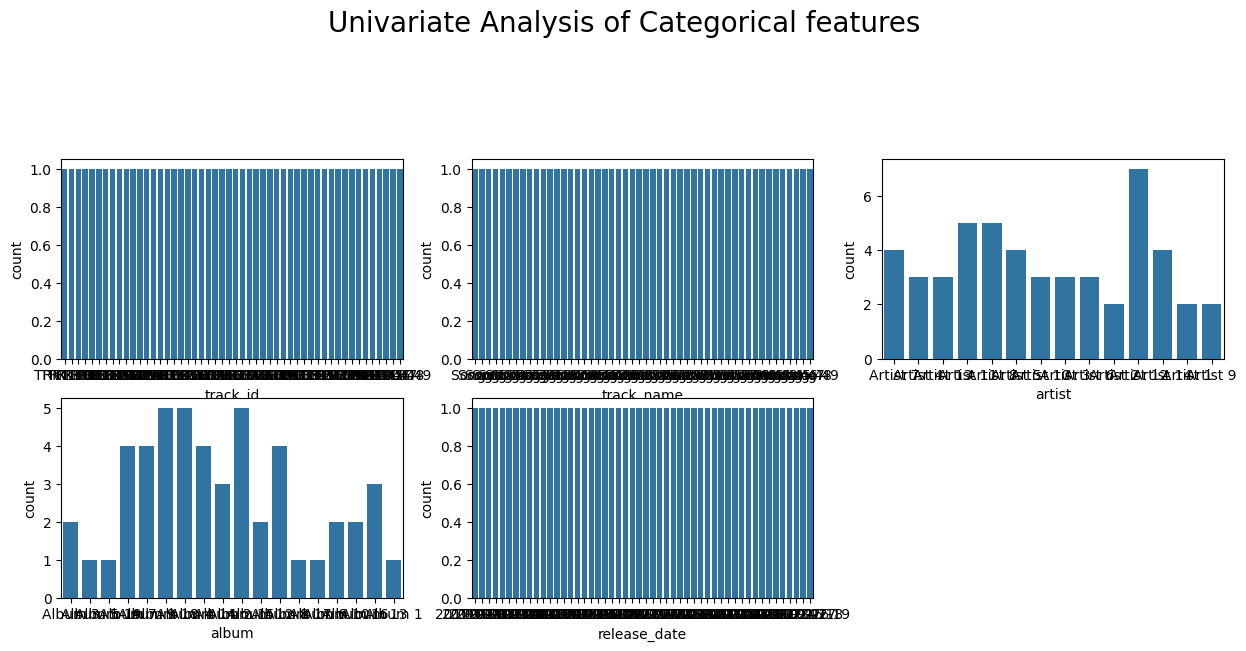

In [ ]:
#uni-variate for categorical features
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Categorical features',fontsize = 20)

for i in range(0,len(categorical_features)):
  plt.subplot(5,3,i+1)
  sns.countplot(x = df1[categorical_features[i]])
  plt.xlabel(categorical_features[i])
plt.show()

/tmp/ipython-input-811330207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df1[category[i]], palette = 'viridis')
/tmp/ipython-input-811330207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df1[category[i]], palette = 'viridis')


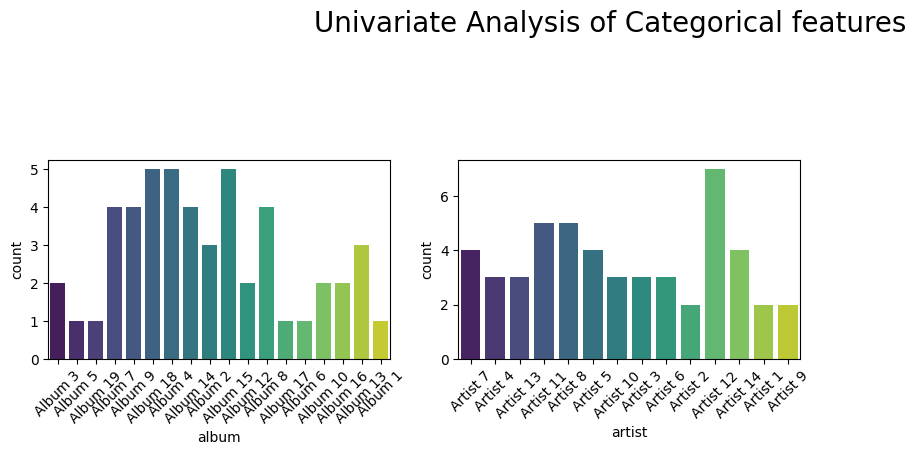

In [ ]:
from pandas.core.arrays import categorical
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical features',fontsize = 20)

category = ['album','artist']

for i in range(0,len(category)):
  plt.subplot(5,3,i+1)
  sns.countplot(x = df1[category[i]], palette = 'viridis')
  plt.xlabel(category[i])
  plt.xticks(rotation = 45)
plt.show()

In [ ]:
df1['album'].value_counts().head(10)

,count
album,
Album 4,5
Album 18,5
Album 15,5
Album 9,4
Album 14,4
Album 7,4
Album 8,4
Album 2,3
Album 13,3


<Axes: ylabel='count'>

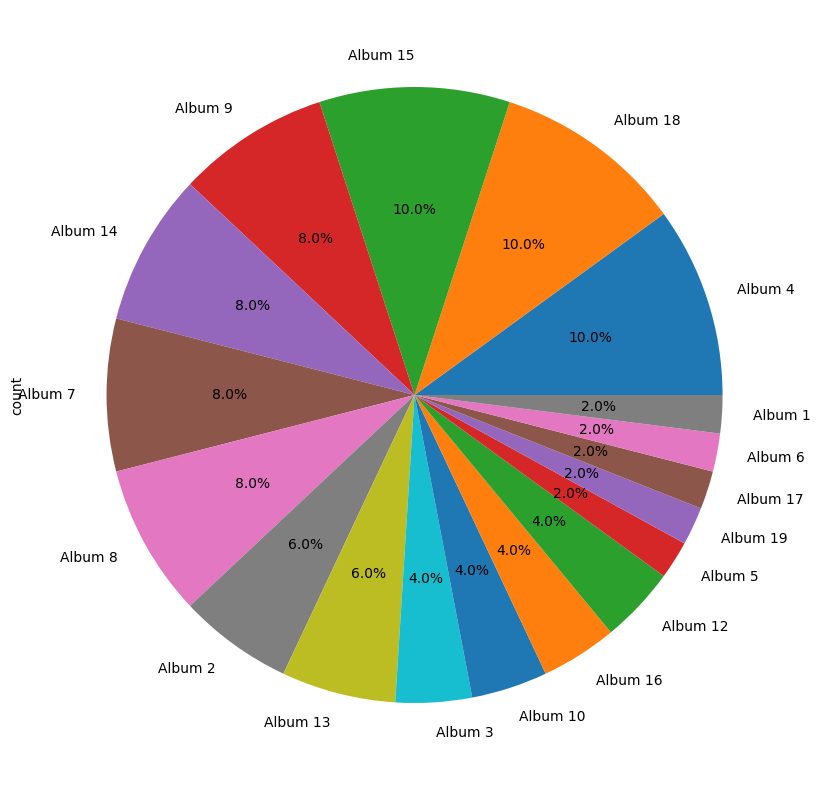

In [ ]:
df1['album'].value_counts().plot.pie(y=df1['album'].value_counts(),figsize=(10,10),autopct = '%1.1f%%')

<Axes: xlabel='artist'>

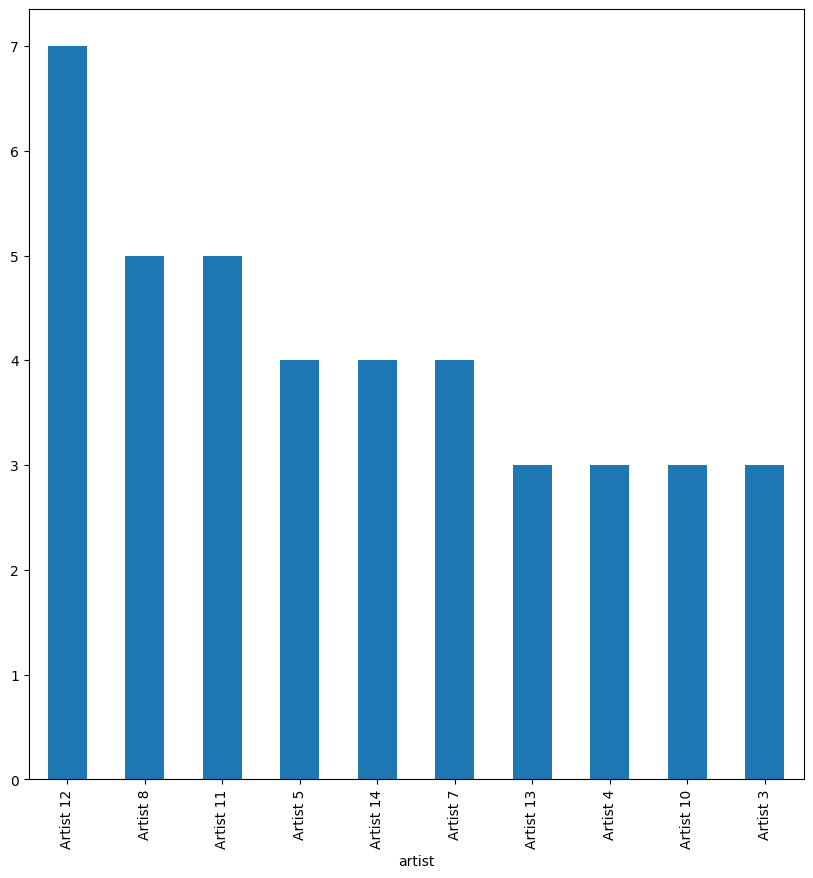

In [ ]:
df1['artist'].value_counts().head(10).plot.bar(figsize=(10,10))

Text(0.5, 1.0, 'Top 10 albums with largest number of artists')

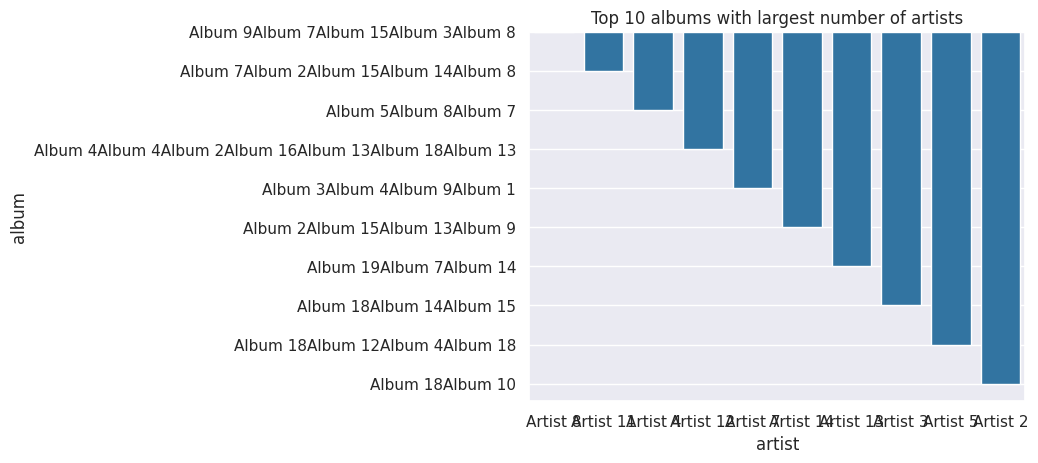

In [ ]:
df_artist_albums = df1.groupby('artist')['album'].sum().sort_values(ascending = False).reset_index()
df2 = df_artist_albums.head(10)
sns.set_style('darkgrid')
ax = sns.barplot(x = 'artist', y = 'album', data = df2)
ax.set_xlabel('artist')
ax.set_ylabel('album')
ax.set_title('Top 10 albums with largest number of artists')